<font size ="10"> Data Visualization</font>

In [37]:
import pandas as pd    
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import numpy as np

Train Data

In [40]:
train = pd.read_parquet("train_compressed.parquet")


Data for specific users

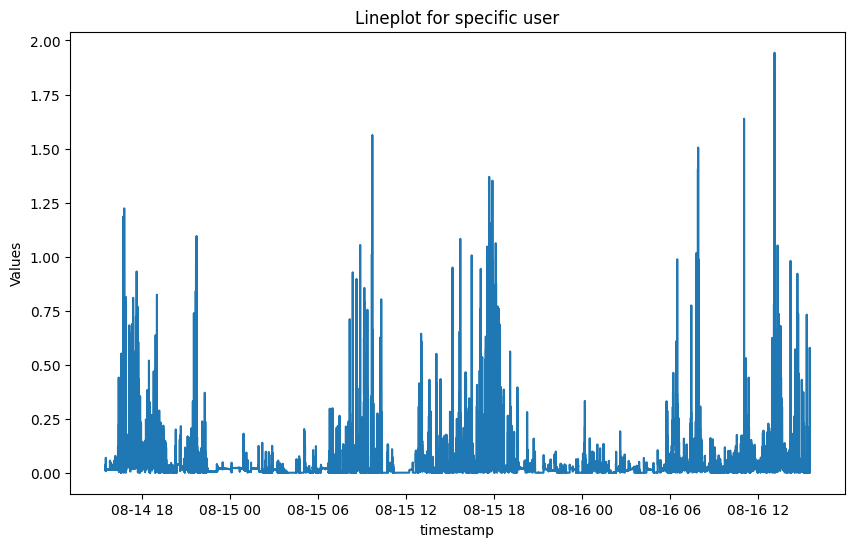

In [7]:
user = train[(train["series_id"] == 0) & (train["step"] < 34560)]
plt.figure(figsize=(10, 6))
sns.lineplot(data=user, y='enmo', x = 'timestamp')
plt.title('Lineplot for specific user')
plt.ylabel('Values')
plt.show()

Visualize the new label positions

In [58]:
events = pd.read_csv("events_modified.csv")
mode = 1
user = 10
pair = 0
#Get all the pairs of adjacent 2 and 4 events
if mode == 0:
    events = events[((events["event"].shift(-1) == 3) | (events["event"] == 3)) & (events["series_id"] == user)]
else:
    events = events[((events["event"].shift(1) == 4) | (events["event"] == 4)) & (events["series_id"] == user)]
timestamp1 = pd.to_datetime(events.iloc[2*pair]["timestamp"], format='%Y-%m-%dT%H:%M:%S%z')
timestamp2 = pd.to_datetime(events.iloc[2*pair+1]["timestamp"], format='%Y-%m-%dT%H:%M:%S%z')
train_curr =  train[(train["timestamp"] > timestamp1-timedelta(hours=12)) & (train["timestamp"] < timestamp2+timedelta(hours=12)) & (train["series_id"] == user)]
print(events.head(10))
print(timestamp1)
print(timestamp2)

     series_id  night  event    step            timestamp
357         10     20      4  335671  2017-09-10 02:42:35
358         10     21      1  349560  2017-09-10 22:00:00
2017-09-10 02:42:35
2017-09-10 22:00:00


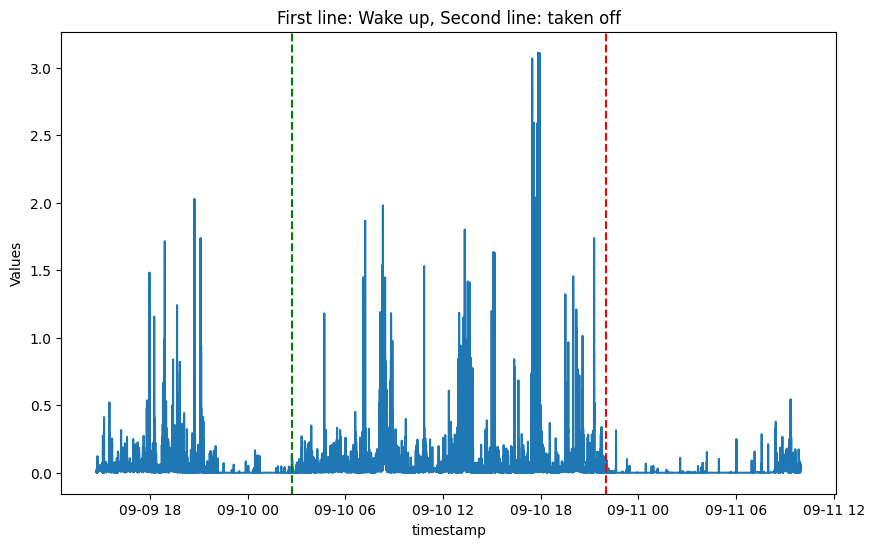

In [59]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=train_curr, y='enmo', x = 'timestamp')
plt.axvline(timestamp1, linestyle="dashed", color = "green")
plt.axvline(timestamp2, linestyle="dashed", color = "red")
plt.title('First line: Wake up, Second line: taken off')
plt.ylabel('Values')
plt.show()

Test Data

In [2]:
test = pd.read_parquet("test_compressed.parquet")

In [19]:
test.head(10)

,series_id,step,timestamp,anglez,enmo
0,0,0,2018-08-14 15:30:00,2.6367,0.0217
1,0,1,2018-08-14 15:30:05,2.6368,0.0215
2,0,2,2018-08-14 15:30:10,2.6370,0.0216
3,0,3,2018-08-14 15:30:15,2.6368,0.0213
4,0,4,2018-08-14 15:30:20,2.6368,0.0215
5,0,5,2018-08-14 15:30:25,2.6367,0.0217
6,0,6,2018-08-14 15:30:30,2.6367,0.0217
7,0,7,2018-08-14 15:30:35,2.6367,0.0218
8,0,8,2018-08-14 15:30:40,2.7980,0.0223
9,0,9,2018-08-14 15:30:45,3.0847,0.0217


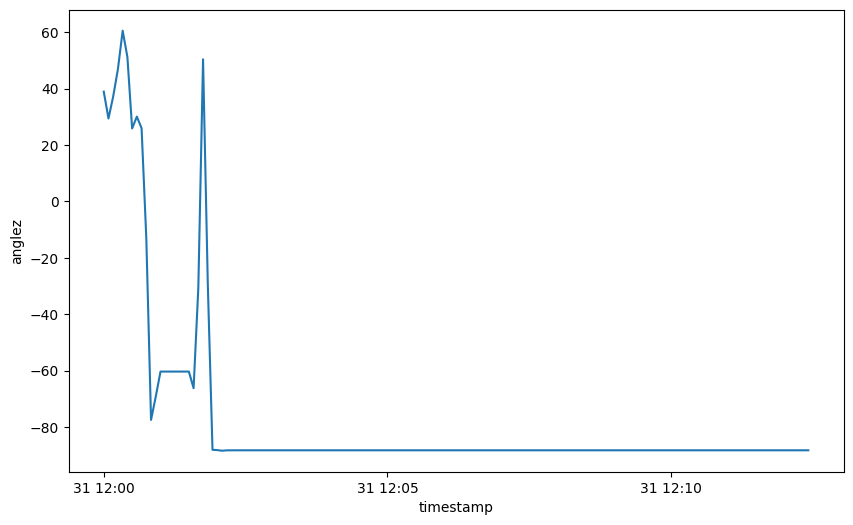

In [34]:
series = 1
series_data = test.loc[test["series_id"] == series]
plt.figure(figsize=(10, 6))
sns.lineplot(data=series_data, y='anglez', x = 'timestamp')
plt.show()

Each test series has 150 values (which are 12.5 minutes)

In [35]:
series_data["timestamp"].min()

Timestamp('2018-05-31 12:00:00')

In [51]:
series = 1
series_data = train.loc[(train["series_id"] == series)][0:17280]
signal_onset = dict(zip(range(1440), np.sin(np.linspace(0, np.pi, 1440) + 0.555 * np.pi) ** 24))
series_data['signal_onset'] = (series_data.timestamp.dt.hour * 60 + series_data.timestamp.dt.minute).map(signal_onset).astype(np.float32)